<a href="https://colab.research.google.com/github/ihobbang250/DS/blob/main/sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

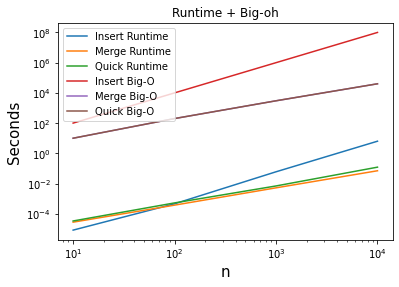

In [ ]:
import random
import time

"""To check if the array is sorted"""
def is_sorted(A):
	if len(A)<2:
		return True
	
	for i in range(1, len(A)):
		if A[i-1] > A[i]:
			return False
	return True

"""sorting algorithms"""
def insertion_sort(A):
	for k in range(1, len(A)):
		cur = A[k]
		j = k
		while j > 0 and A[j-1] > cur:
			A[j] = A[j-1]
			j -= 1
		A[j] = cur
		
def merge(S1, S2, S):
	i = j = 0
	while i+j < len(S):
		if j == len(S2) or (i < len(S1) and S1[i] < S2[j]):
			S[i+j] = S1[i]
			i += 1
		else:
			S[i+j] = S2[j]
			j += 1

def merge_sort(S):
	n = len(S)
	if n < 2:
		return
	mid = n // 2
	S1 = S[0:mid]
	S2 = S[mid:n]

	merge_sort(S1)
	merge_sort(S2)
 
	merge(S1, S2, S)

def quick_sort(S):
	#base case for Recur
	if len(S) < 2:
		return
	
	#divide
	pivot = S[0]
	L, E, G = [], [], []
	
	while len(S) > 0:
		x = S.pop()
		if x < pivot :
			L.append(x)
		elif x == pivot :
			E.append(x)
		else:
			G.append(x)
	
	#conquer
	quick_sort(L)
	quick_sort(G)
	
	#combine L, E, G to S
	while len(L) > 0:
		S.append(L.pop(0))
	while len(E) > 0:
		S.append(E.pop(0))
	while len(G) > 0:
		S.append(G.pop(0))

def algo_time(n):  # change parameter to compare different algorithms	
	array = [random.randint(0, 999999999) for _ in range(n)]

	array_insertion = array.copy()
	start = time.perf_counter()
	insertion_sort(array_insertion)
	t_insertion = time.perf_counter() - start
	
	array_merge = array.copy()
	start = time.perf_counter()
	merge_sort(array_merge)
	t_merge = time.perf_counter() - start

	array_quick = array.copy()
	start = time.perf_counter()
	quick_sort(array_quick)
	t_quick = time.perf_counter() - start

	sort_algo = [t_insertion, t_merge, t_quick]
	return sort_algo

#dataset - > n, insert, merge, quick 
num_list =list(map(lambda x : 10 ** x, range(1,5))) # n = 10, 100, 1000, 10000
insert_time = [] # depend on n
merge_time = []
quick_time = []
for i in num_list: 
	temp = algo_time(i)
	insert_time.append(temp[0])
	merge_time.append(temp[1])
	quick_time.append(temp[2])

'''
#plot the time
import matplotlib.pyplot as plt
x = num_list
y1 = insert_time
y2 = merge_time
y3 = quick_time
insert_log = plt.loglog(x, y1) #Insert graph
merge_log = plt.loglog(x, y2) #Merge graph
quick_log = plt.loglog(x, y3) #Quick graph
plt.legend( insert_log+ merge_log+ quick_log, ['Insertion', 'Merge', 'Quick']) 
plt.title('Algorithm Time', fontsize = 15)
plt.xlabel('n', fontsize = 15)
plt.ylabel('Seconds', fontsize = 15)
plt.figure (figsize = (20,20))
plt.show()
'''

#Plot part
import matplotlib.pyplot as plt
import math
x = num_list
y1 = insert_time
y2 = merge_time
y3 = quick_time
insert_log = plt.loglog(x, y1) #Insert graph
merge_log = plt.loglog(x, y2) #Merge graph
quick_log = plt.loglog(x, y3) #Quick graph
insert_big = list(map(lambda i: i**2, x)) #insert -> Big-o : O(n^2)
merge_big = list(map(lambda i: i * math.log10(i), x))
quick_big = list(map(lambda i: i * math.log10(i), x)) #Quick, Merge -> Big-o : O(nlog(n))
insert_big_graph= plt.loglog(x, insert_big)
merge_big_graph = plt.loglog(x, merge_big)
quick_big_graph = plt.loglog(x, quick_big)
plt.legend( insert_log+ merge_log+ quick_log+ insert_big_graph+ merge_big_graph+ quick_big_graph , 
           ['Insert Runtime', 'Merge Runtime', 'Quick Runtime', 'Insert Big-O', 'Merge Big-O', 'Quick Big-O'])
plt.title('Runtime + Big-oh')
plt.xlabel('n' , fontsize = 15)
plt.ylabel('Seconds' , fontsize = 15)
plt.show()